## PYTHON ADVANCED TECHNOLOGY 
### FACE RECOGNITION - UPYTER NOTEBOOK

In [1]:
!pip install dlib

In [2]:
!pip install cmake

In [3]:
!pip install opencv-python

In [4]:
!pip install face_recognition

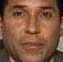

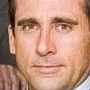

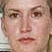

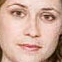

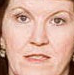

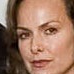

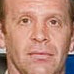

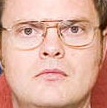

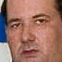

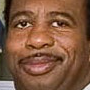

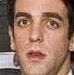

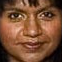

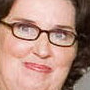

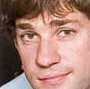

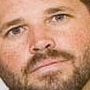

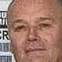

In [5]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("office.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    display(pil_image)

In [6]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw

# Load a sample picture and learn how to recognize it.
known_image = face_recognition.load_image_file("toby.jpg")
encoding = face_recognition.face_encodings(known_image)[0]

# Load an image with unknown faces
unknown_image = face_recognition.load_image_file("office.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)

# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces([encoding], face_encoding)

    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance([encoding], face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left - 20, top - 20), (right + 20, bottom + 20)), outline=(0, 255, 0), width=20)

# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
pil_image.show()

In [7]:
print("That's it! Thank you very much")

That's it! Thank you very much
